In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
olympics_history = pd.read_csv(r"D:\DA\Projects\Olympics_data\athlete_events.csv")
olympics_history


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [67]:
olympics_history_noc = pd.read_csv(r"D:\DA\Projects\Olympics_data\noc_regions.csv")
olympics_history_noc


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


# Both Tables Information

In [68]:
olympics_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [69]:
olympics_history_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# Checking Null Values

In [72]:
olympics_history.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [73]:
olympics_history_noc.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

#  Which nation has participated in all of the olympic games

In [113]:
a= olympics_history[['Games']].nunique()
a


Games    51
dtype: int64

In [128]:
z=olympics_history.merge(olympics_history_noc, on=['NOC'], how='inner')
No_of_Games_Played['Boolean'] =z.groupby(by=['region'])[['Games']].nunique()==a
No_of_Games_Played.loc[No_of_Games_Played.Boolean==True, ['Games']]

,Games
region,
France,51
Italy,51
Switzerland,51
UK,51


#  Identify the sport which was played in all summer olympics.

In [138]:
summer_games= olympics_history.loc[olympics_history.Season=='Summer',:]
summer_games_played=summer_games['Games'].nunique()
summer_games_played

29

In [ ]:
summer_games= olympics_history.loc[olympics_history.Season=='Summer',:]
sports_in_all_summer_games['Boolean']= summer_games.groupby(by=['Sport'])[['Games']].nunique()==summer_games_played
sports_in_all_summer_games.loc[sports_in_all_summer_games.Boolean==True, ['Games']]

# OR

In [150]:
summer_games= olympics_history.loc[olympics_history.Season=='Summer',:]
sports_in_all_summer_games['Boolean']= summer_games.groupby(by=['Sport'])[['Games']].nunique()==summer_games['Games'].nunique()
sports_in_all_summer_games.loc[sports_in_all_summer_games.Boolean==True, ['Games']]

,Games
Sport,
Athletics,29
Cycling,29
Fencing,29
Gymnastics,29
Swimming,29


# Which Sports were just played only once in the olympics

In [161]:
sports_played = olympics_history.groupby(by=['Sport'])[['Games']].nunique()
a=sports_played.loc[sports_played.Games==1,]
a.rename(columns={'Games':'No_of_Times_Played_in_Olympics'})

,No_of_Times_Played_in_Olympics
Sport,
Aeronautics,1
Basque Pelota,1
Cricket,1
Croquet,1
Jeu De Paume,1
Military Ski Patrol,1
Motorboating,1
Racquets,1
Roque,1


# Fetch the total no of sports played in each olympic games.

In [167]:
a=olympics_history.groupby(by=['Games'])[['Sport']].nunique()
a.sort_values(by=['Sport'], ascending=False, inplace=True)
a.head(10)

,Sport
Games,
2016 Summer,34
2004 Summer,34
2008 Summer,34
2000 Summer,34
2012 Summer,32
1996 Summer,31
1992 Summer,29
1988 Summer,27
1920 Summer,25


# Fetch oldest athletes to win a gold medal

In [184]:
b=a.Age.max()
a=olympics_history.loc[(olympics_history.Medal=='Gold')&(olympics_history.Age==b),:]
a

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold


# Fetch the top 5 athletes who have won the most gold medals.

In [209]:
gold_medals= olympics_history.loc[olympics_history.Medal=='Gold',:]
athlete_won_gold=gold_medals.groupby(by=['ID', 'Name'])[['Medal']].count()
athlete_won_gold.sort_values(by=['Medal'], ascending=False, inplace=True)
Top_5_athlete= athlete_won_gold.head(5)
Top_5_athlete

,,Medal
ID,Name,
94406,"Michael Fred Phelps, II",23
33557,"Raymond Clarence ""Ray"" Ewry",10
67046,Larysa Semenivna Latynina (Diriy-),9
87390,Paavo Johannes Nurmi,9
69210,"Frederick Carlton ""Carl"" Lewis",9


# Fetch the top 5 athletes who have won the most medals (gold/silver/bronze)

In [237]:
medals= olympics_history.loc[(olympics_history.Medal=='Gold')|(olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')]
medal_won=medals.groupby(by=['ID','Name'])[['Medal']].count()
medal_won.sort_values(by=['Medal'], ascending=False, inplace=True)
medal_won.head(5)


,,Medal
ID,Name,
94406,"Michael Fred Phelps, II",28
67046,Larysa Semenivna Latynina (Diriy-),18
4198,Nikolay Yefimovich Andrianov,15
11951,Ole Einar Bjrndalen,13
109161,Borys Anfiyanovych Shakhlin,13


# Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [247]:
medals= olympics_history.loc[(olympics_history.Medal=='Gold')|(olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')]
f=medals.merge(olympics_history_noc, on=['NOC'], how= 'inner')
Medal_won=f.groupby(by=['region'])[['Medal']].count()
Medal_won.sort_values(by=['Medal'], inplace=True, ascending=False)
Medal_won.head(5)

,Medal
region,
USA,5637
Russia,3947
Germany,3756
UK,2068
France,1777


# List down total gold, silver and bronze medals won by each country.

In [274]:
medals= olympics_history.loc[(olympics_history.Medal=='Gold')|(olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')]
merging_tables = medals.merge(olympics_history_noc, on='NOC', how='inner')
a=merging_tables.pivot_table(index=['region'], columns=['Medal'], values=['ID'], aggfunc='count')
a.sort_index(axis=0, ascending=False, inplace = True)
a.fillna(0)

ID              
Medal              Bronze   Gold Silver
region                                 
Zimbabwe              1.0   17.0    4.0
Zambia                1.0    0.0    1.0
Virgin Islands, US    0.0    0.0    1.0
Vietnam               0.0    1.0    3.0
Venezuela            10.0    2.0    3.0
...                   ...    ...    ...
Australia           522.0  368.0  459.0
Armenia               9.0    2.0    5.0
Argentina            91.0   91.0   92.0
Algeria               8.0    5.0    4.0
Afghanistan           2.0    0.0    0.0

[136 rows x 3 columns]

# List down total gold, silver and bronze medals won by each country corresponding to each olympic games.

In [280]:
medals= olympics_history.loc[(olympics_history.Medal=='Gold')|(olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')]
a = medals.merge(olympics_history_noc, on='NOC', how='inner')
b=a.pivot_table(index=['Games','region'], values=['ID'], columns=['Medal'], aggfunc='count', margins=True, margins_name='Total Medals')
b.fillna(0)

ID                               
Medal                               Bronze     Gold   Silver Total Medals
Games        region                                                      
1896 Summer  Australia                 1.0      2.0      0.0            3
             Austria                   2.0      2.0      1.0            5
             Denmark                   3.0      1.0      2.0            6
             France                    2.0      5.0      4.0           11
             Germany                   2.0     25.0      5.0           32
...                                    ...      ...      ...          ...
2016 Summer  United Arab Emirates      1.0      0.0      0.0            1
             Uzbekistan                7.0      4.0      2.0           13
             Venezuela                 2.0      0.0      1.0            3
             Vietnam                   0.0      1.0      1.0            2
Total Medals                       13291.0  13371.0  13112.0        39774

[1641 rows x 4 columns]

# In which Sport/event, India has won highest medals.

In [55]:
Medals= olympics_history.loc[(olympics_history.NOC=='IND')&((olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')|(olympics_history.Medal=='Gold'))]
medal_won=Medals.groupby(by=['Sport'])[['Medal']].count()
medal_won.sort_values(by=['Medal'], ascending= False, inplace=True)
medal_won.head(1)

,Medal
Sport,
Hockey,173


# Total Male and Female participated in Olympics since starting.

<Axes: xlabel='Sex', ylabel='count'>

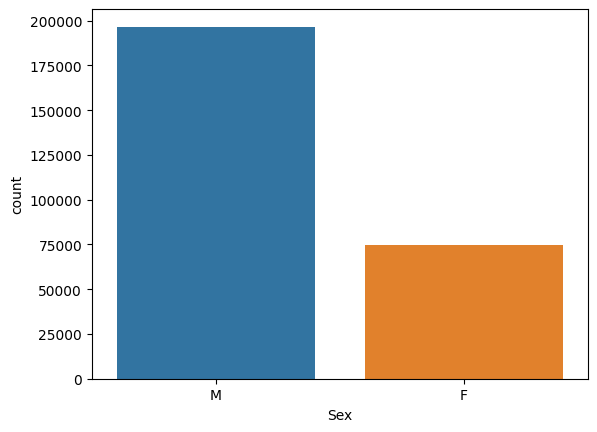

In [56]:
sns.countplot(data=olympics_history, x='Sex', hue='Sex')


#  Total Medals won by India in each Sports

C:\Users\Sourabh\AppData\Local\Temp\ipykernel_11224\2818554380.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45);


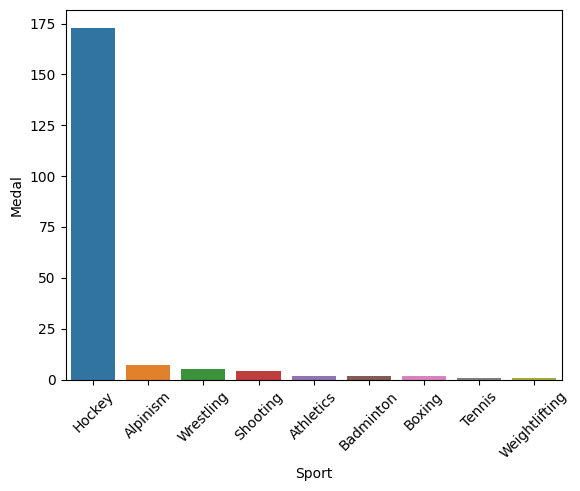

In [5]:
Medals= olympics_history.loc[(olympics_history.NOC=='IND')&((olympics_history.Medal=='Silver')|(olympics_history.Medal=='Bronze')|(olympics_history.Medal=='Gold'))]
medal_won=Medals.groupby(by=['Sport'])[['Medal']].count()
medal_won.sort_values(by=['Medal'], ascending= False, inplace=True)
medal_won.reset_index(inplace=True)
a=sns.barplot(data=medal_won, x='Sport', y='Medal', hue='Sport')
a.set_xticklabels(a.get_xticklabels(), rotation=45);
plt.show()

# Show top 5 Sports in which most Medals won

Text(0.5, 1.0, 'Medals by Sports')

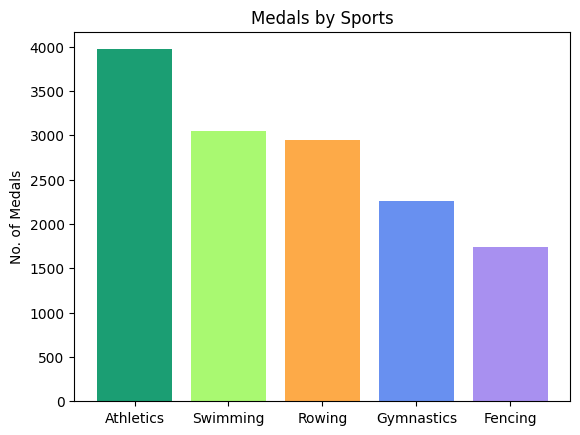

In [50]:
a=olympics_history.groupby(by=['Sport'])[['Medal']].count()
a.sort_values(by=['Medal'], ascending=False, inplace=True)
b=a.head(5)
b.reset_index(inplace=True)
colors = ['#1b9e73', '#a9f971', '#fdaa48','#6890F0','#A890F0']
b=plt.bar(b.Sport, b.Medal, color=colors)
plt.ylabel('No. of Medals')
plt.title('Medals by Sports')
